# 0. Các khởi tạo

## Thư viện

In [187]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt
import seaborn as sns

## Visualization functions

In [188]:
# PCA 
def scree_plot(pca, color='ro-'):
    plt.figure(figsize=(6,5))
    plt.plot(pca.explained_variance_ratio_, color, linewidth=2)
    plt.title('Scree Plot')
    plt.xticks(range(len(pca.explained_variance_ratio_)), range(1, len(pca.explained_variance_ratio_) + 1))
    plt.xlabel('Principal Components')
    plt.ylabel('Eigenvalues')
    plt.show()

# Iris dataset
def iris_dataset_plot(target_names, feature_names, X, y):
    # Tạo DataFrame với cột species
    df = pd.DataFrame(X, columns=feature_names)
    df['species'] = [target_names[i] for i in y]

    # 1. Pairplot: Hiển thị mối quan hệ giữa các features
    plt.figure(figsize=(12, 8))
    sns.pairplot(df, hue='species')
    plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
    plt.show()

    # 2. Boxplot cho từng feature theo class
    plt.figure(figsize=(12, 6))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        sns.boxplot(x='species', y=df[feature_names[i]], data=df)
        plt.title(f'{feature_names[i]} by Class')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Correlation Heatmap
    plt.figure(figsize=(8, 6))
    correlation_matrix = np.corrcoef(X.T)
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm',
                xticklabels=feature_names,
                yticklabels=feature_names)
    plt.title('Correlation Matrix of Iris Features')
    plt.show()

    # 4. Scatter plot của 2 features quan trọng nhất (petal length vs petal width)
    plt.figure(figsize=(8, 6))
    for i, name in enumerate(target_names):
        plt.scatter(X[y==i, 2], X[y==i, 3], label=name, alpha=0.7)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Petal Length vs Petal Width')
    plt.legend()
    plt.show()

# 1. Định nghĩa class MyPCA

In [189]:
class MyPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean_ = None
        self.components_ = None
        self.explained_variance_ = None
        self.total_var_ = None
        self.explained_variance_ratio_ = None
        self.cumulative_explained_variance_ = None

    def fit(self, X):
        # 1) Tâm dữ liệu
        self.mean_ = np.mean(X, axis=0)
        Xc = X - self.mean_
        # 2) Ma trận hiệp phương sai
        n_samples = X.shape[0]
        C = np.dot(Xc.T, Xc) / (n_samples - 1)
        # 3) Tính trị riêng và vector riêng
        eigvals, eigvecs = np.linalg.eigh(C)
        # 4) Sắp xếp giảm dần
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        # 5) Chọn số thành phần
        if self.n_components is not None:
            eigvals = eigvals[:self.n_components]
            eigvecs = eigvecs[:, :self.n_components]
        # 6) Lưu kết quả
        self.components_ = eigvecs.T
        self.explained_variance_ = eigvals
        self.total_var_ = np.sum(self.explained_variance_)
        self.explained_variance_ratio_ = eigvals / self.total_var_
        self.cumulative_explained_variance_ = np.cumsum(self.explained_variance_ratio_)
        
        return self
    
    def transform(self, X):
        Xc = X - self.mean_

        return np.dot(Xc, self.components_.T)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# 2. Chuẩn bị bộ dữ liệu Iris 

## Load dataset

In [190]:
iris = datasets.load_iris()
X_iris = iris.data  
y_iris = iris.target

## Các thông tin về dataset

In [191]:
# 1 số thông tin của dataset
print("Thông tin chung về bộ dữ liệu Iris:")
print("Số mẫu (dòng):", X_iris.shape[0])
print("Số đặc trưng (cột):", X_iris.shape[1])
print("Các lớp:", np.unique(y_iris))
print("Số lượng mẫu mỗi lớp:", np.bincount(y_iris))
feature_names = iris.feature_names
print("Tên các đặc trưng:")
for i, name in enumerate(feature_names):
    print(f"  {i+1}. {name}")

Thông tin chung về bộ dữ liệu Iris:
Số mẫu (dòng): 150
Số đặc trưng (cột): 4
Các lớp: [0 1 2]
Số lượng mẫu mỗi lớp: [50 50 50]
Tên các đặc trưng:
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)


In [192]:
print("\n5 dòng đầu tiên:")
df = pd.DataFrame(X_iris, columns=iris.feature_names)
df['target'] = y_iris
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
target_names = iris.target_names
df.head()


5 dòng đầu tiên:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [193]:
print("\nThống kê mô tả:")
print(df[iris.feature_names].describe()) 


Thống kê mô tả:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Visualization:


<Figure size 1200x800 with 0 Axes>

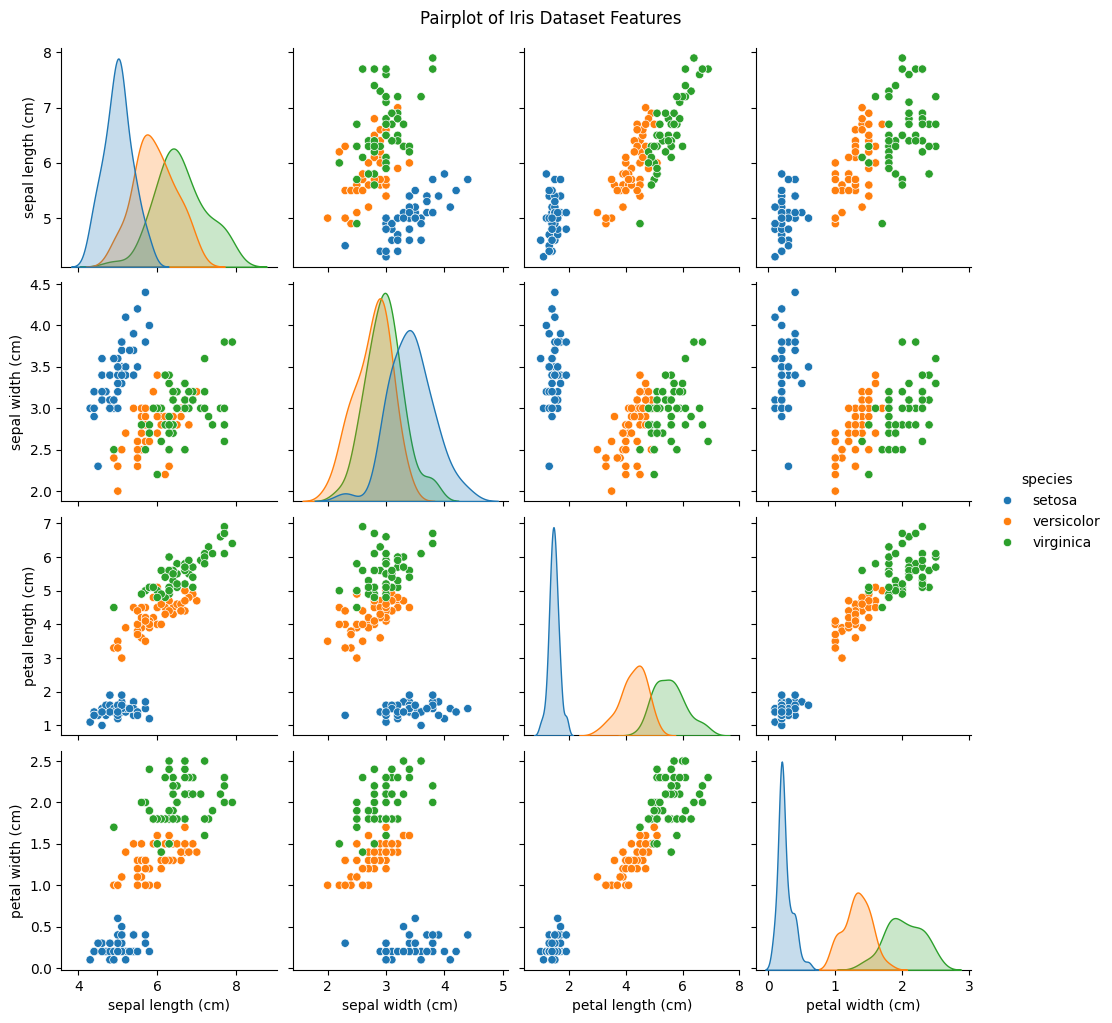

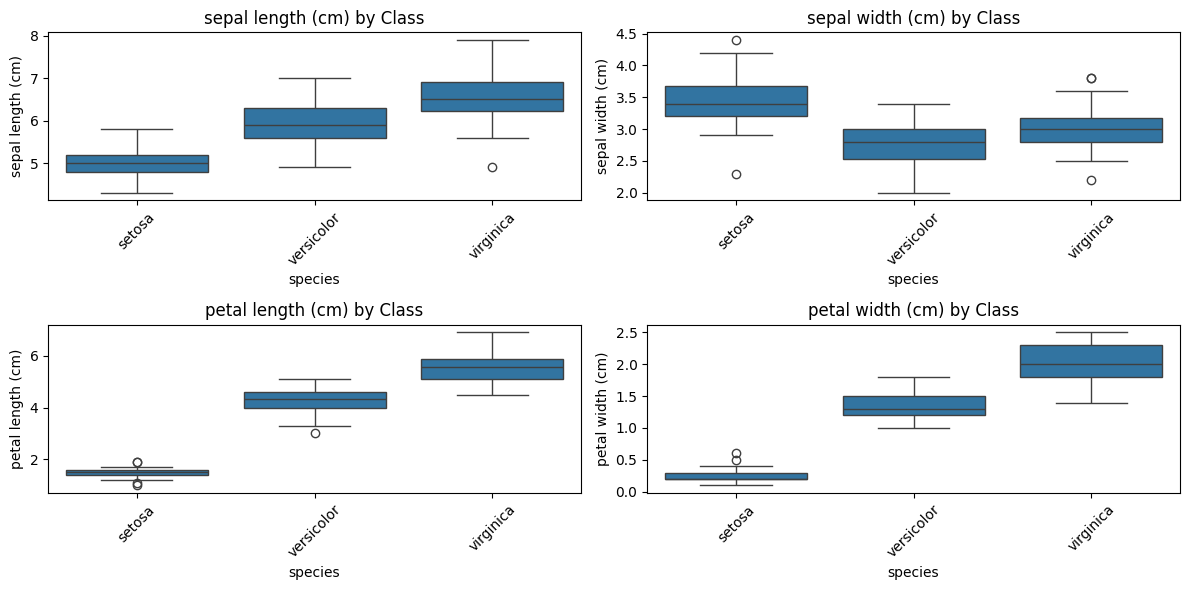

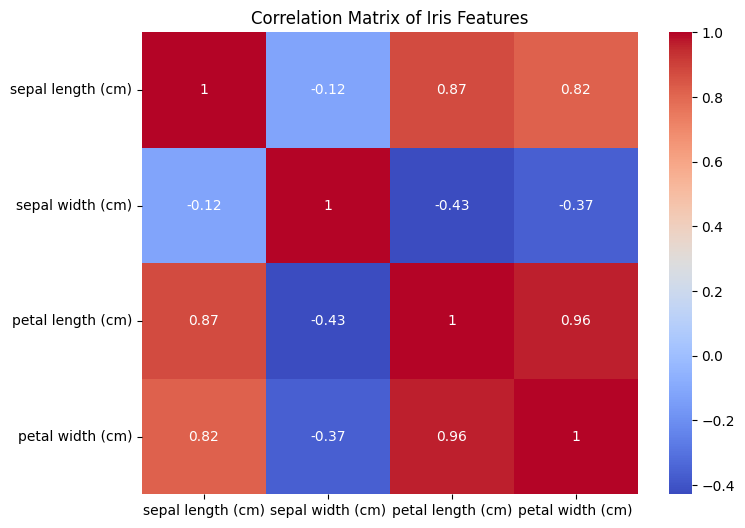

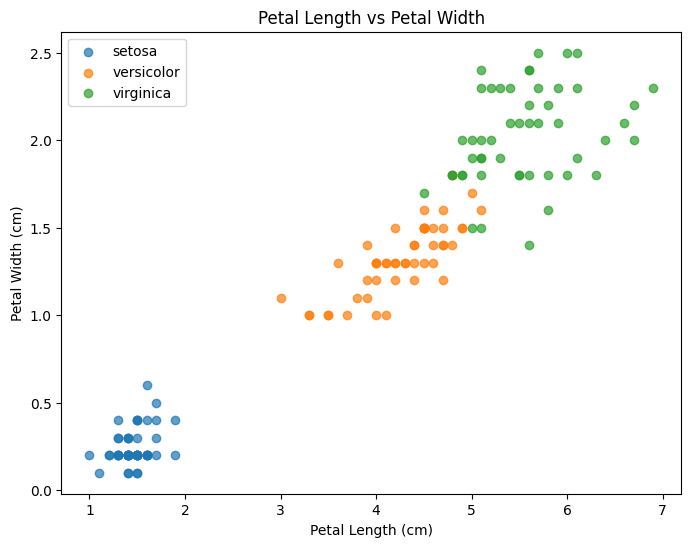

In [194]:
#plot
print("Visualization:")
iris_dataset_plot(target_names, feature_names, X_iris, y_iris)

## Chuẩn hóa 

In [195]:
X_iris_std = (X_iris - X_iris.mean(axis=0)) / X_iris.std(axis=0)

# 3. Xác định số thành phần chính

In [196]:
# xác định số thành phần chính
k = 4

# 4. Sử dụng MyPCA 

##  Áp dụng MyPCA lấy k thành phần

In [197]:
my_pca = MyPCA(n_components=k)
X2_iris = my_pca.fit_transform(X_iris_std)

## Scree Plot

Trị riêng của các thành phần chính:


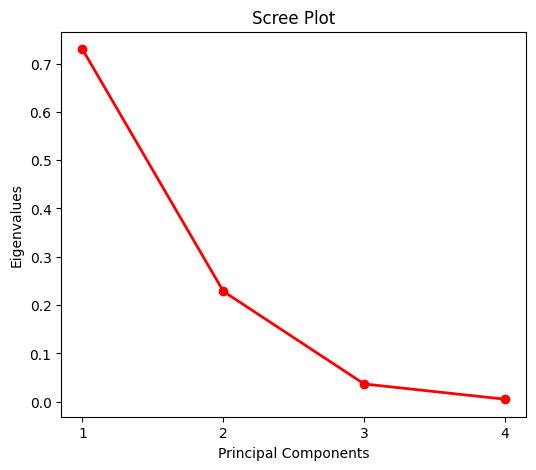

In [198]:
print("Trị riêng của các thành phần chính:")
scree_plot(my_pca)

## Kết quả

In [199]:
# In EVR / CEVR
print("Kết quả của MyPCA:")
print(" - EVR:", my_pca.explained_variance_ratio_)
print(" - CEVR:", my_pca.cumulative_explained_variance_)

Kết quả của MyPCA:
 - EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
 - CEVR: [0.72962445 0.95813207 0.99482129 1.        ]


# 5. Sử dụng PCA của skit-learn

In [200]:
from sklearn.decomposition import PCA

In [201]:
sklearn_pca = PCA(n_components=k)
X2_iris_sklearn = sklearn_pca.fit_transform(X_iris_std)

Trị riêng của các thành phần chính:


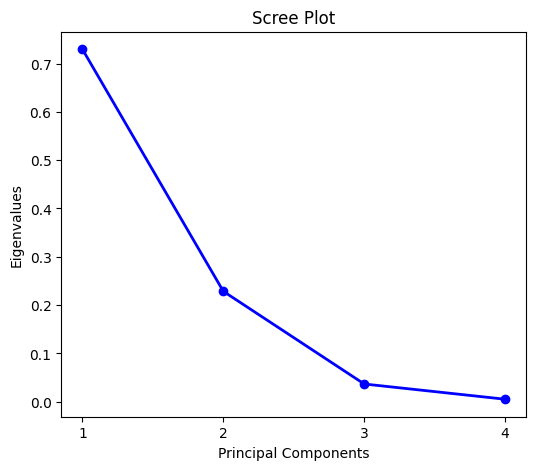

In [202]:
print("Trị riêng của các thành phần chính:")
scree_plot(sklearn_pca, 'bo-')


# 6. So sánh 2 mô hình PCA

In [203]:
# so sanh 2 PCA
print("So sánh 2 PCA:")
print("\n Sklearn PCA:")
print("  - EVR:", sklearn_pca.explained_variance_ratio_)
print("  - CEVR:", np.cumsum(sklearn_pca.explained_variance_ratio_))
print("\nMyPCA:")
print("  - EVR:", my_pca.explained_variance_ratio_)
print("  - CEVR:", my_pca.cumulative_explained_variance_)



So sánh 2 PCA:

 Sklearn PCA:
  - EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
  - CEVR: [0.72962445 0.95813207 0.99482129 1.        ]

MyPCA:
  - EVR: [0.72962445 0.22850762 0.03668922 0.00517871]
  - CEVR: [0.72962445 0.95813207 0.99482129 1.        ]


## Kết luận
- Dựa trên kết quả so sánh, ta thấy rằng PCA tự cài đặt và PCA của sklearn cho ra các giá trị explained variance ratio (EVR) và cumulative explained variance ratio (CEVR) giống hệt nhau.
- Điều này cho thấy việc cài đặt PCA thủ công là chính xác và cho kết quả tương đương với thư viện sklearn. 
- Như vậy, ta có thể tin tưởng vào cả hai phương pháp khi áp dụng PCA cho bộ dữ liệu này.
